In [121]:
import pandas as pd
import numpy as np
from IPython.display import display

## Merge, join, concatenate

pandas provides various methods for combining and comparing Series or DataFrame

## concat()

In [122]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)
display(df1)
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[0, 1, 2, 3],
)
display(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [123]:
result = pd.concat([df1, df2], axis=0)
display(result)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [124]:
result = pd.concat([df1, df2], axis=1)
display(result)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## Merge()

merge() performs join operations similar to relational databases like SQL

In [125]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K20", "K30"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
display(left)
display(right)
result = pd.merge(left, right, on="key", how="inner")
display(result)

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K20,C2,D2
3,K30,C3,D3


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


In [126]:
result = pd.merge(left, right, on="key", how="left")
display(result)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN


In [127]:
result = pd.merge(left, right, on="key", how="right")
display(result)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K20,NaN,NaN,C2,D2
3,K30,NaN,NaN,C3,D3


In [128]:
result = pd.merge(left, right, on="key", how="outer")
display(left)
display(right)
display(result)

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K20,C2,D2
3,K30,C3,D3


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K20,NaN,NaN,C2,D2
4,K3,A3,B3,NaN,NaN
5,K30,NaN,NaN,C3,D3


## Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.

- Applying a function to each group independently.

- Combining the results into a data structure.

In [129]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)
display(animals)

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [130]:
# assume we want to know mean height and max weight for every kind ?
grp = animals.groupby(by=["kind"]).aggregate({"height": np.mean, "weight": np.min})
display(grp)

/tmp/ipykernel_4629/3106755489.py:2: FutureWarning: The provided callable <function mean at 0x7fa0b4504af0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp = animals.groupby(by=["kind"]).aggregate({"height": np.mean, "weight": np.min})
/tmp/ipykernel_4629/3106755489.py:2: FutureWarning: The provided callable <function min at 0x7fa0b4504310> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grp = animals.groupby(by=["kind"]).aggregate({"height": np.mean, "weight": np.min})


,height,weight
kind,,
cat,9.3,7.9
dog,20.0,7.5


In [131]:
# we want to know max and min height for every kind
grp = animals.groupby(by=["kind"]).aggregate({"height": np.max, "height": np.min})
display(grp)

/tmp/ipykernel_4629/3588785261.py:2: FutureWarning: The provided callable <function min at 0x7fa0b4504310> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grp = animals.groupby(by=["kind"]).aggregate({"height": np.max, "height": np.min})


,height
kind,
cat,9.1
dog,6.0


In [132]:
# we can user rename() function to give agg column meaninigfful names
grp = (
    animals.groupby(by=["kind"])
    .aggregate({"height": np.mean, "weight": np.min})
    .rename(columns={"height": "mean_height", "weight": "min_weight"})
)
display(grp)

/tmp/ipykernel_4629/1235682412.py:4: FutureWarning: The provided callable <function mean at 0x7fa0b4504af0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .aggregate({"height": np.mean, "weight": np.min})
/tmp/ipykernel_4629/1235682412.py:4: FutureWarning: The provided callable <function min at 0x7fa0b4504310> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .aggregate({"height": np.mean, "weight": np.min})


,mean_height,min_weight
kind,,
cat,9.3,7.9
dog,20.0,7.5


In [133]:
# we can use custom aggregation function
# assume we want to compute for each group the difference between max height - min height
from typing import List


def max_minus_min(group: List) -> float:
    """accepts group as list return max(list)-min(list)

    Args:
        group (List): splitted group after groupby()

    Returns:
        float: max(list)-min(list)
    """
    return max(group) - min(group)


display(animals)
grp = animals.groupby(["kind"]).aggregate({"height": max_minus_min})
display(grp)

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


,height
kind,
cat,0.4
dog,28.0


## dealing with text data

In [134]:
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
# create new column "surname" which is first part on "Name" before ","
titanic["surname"] = titanic["Name"].apply(lambda x: str(x).split(",")[0])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [136]:
# Which passenger of the Titanic has the longest name?
# solution
# create new temp col "name_len"
titanic["name_len"] = titanic["Name"].str.len()
display(
    titanic.sort_values(by="name_len", ascending=False, ignore_index=True).iloc[0][
        "Name"
    ]
)
# delete the temp col
del titanic["name_len"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [137]:
# Quiz
# suppose we want "name" column to be for example "Mr. Owen Harris, Braund" instead of "Braund, Mr. Owen Harris"
def swap_name(name: str) -> str:
    """for example "Mr. Owen Harris, Braund" instead of "Braund, Mr. Owen Harris"

    Args:
        name (str):

    Returns:
        str:
    """
    return None  # implement the function


titanic["Name"] = titanic["Name"].apply(swap_name)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,0,3,None,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,None,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,None,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,None,female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,None,male,35.0,0,0,373450,8.0500,NaN,S,Allen


## basic time series data manipulation

In [138]:
opsd_daily = pd.read_csv(
    "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv",
    delimiter=",",
)
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [139]:
# very useful to make "Date" as index but make sure to convert it to datetime datatype
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])
display(opsd_daily.dtypes)
opsd_daily.set_index("Date", inplace=True)
display(opsd_daily.head())

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [140]:
# Add columns with year, month, and weekday
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.weekday
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


In [141]:
"""
One of the most powerful and convenient features of pandas time series is time-based indexing — using dates and times to intuitively organize and access our data. 
With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the loc accessor. 
The indexing works similar to standard label-based indexing with loc
"""

display(opsd_daily.loc["2017-08-10"])
display(opsd_daily.loc["2014-01-20":"2014-01-22"])

Consumption     1351.491
Wind             100.274
Solar             71.160
Wind+Solar       171.434
Year            2017.000
Month              8.000
Weekday Name       3.000
Name: 2017-08-10 00:00:00, dtype: float64

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


<Axes: xlabel='Date'>

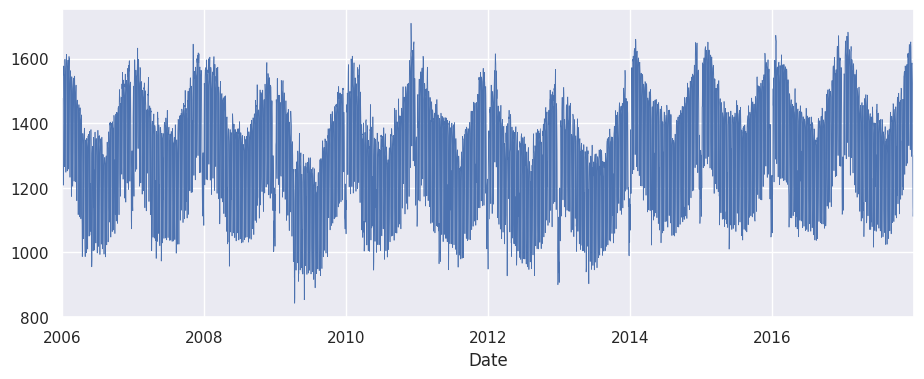

In [142]:
# With pandas and matplotlib, we can easily visualize our time series data. In this section, we'll cover a few examples and some useful customizations for our time series plots. First, let's import matplotlib.


import matplotlib.pyplot as plt

# Display figures inline in Jupyter notebook
# We'll use seaborn styling for our plots, and let's adjust the default figure size to an appropriate shape for time series plots.


import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={"figure.figsize": (11, 4)})
# Let's create a line plot of the full time series of Germany's daily electricity consumption, using the DataFrame's plot() method.


opsd_daily["Consumption"].plot(linewidth=0.5)

In [143]:
# let us resample data for better visualization
opsd_daily.resample("M")["Consumption"].aggregate("mean")

/tmp/ipykernel_4629/433449169.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  opsd_daily.resample("M")["Consumption"].aggregate("mean")


Date
2006-01-31    1461.442065
2006-02-28    1467.106893
2006-03-31    1418.649161
2006-04-30    1275.058900
2006-05-31    1253.488484
                 ...     
2017-08-31    1291.283022
2017-09-30    1335.952031
2017-10-31    1366.297385
2017-11-30    1477.990818
2017-12-31    1435.842075
Freq: ME, Name: Consumption, Length: 144, dtype: float64

/tmp/ipykernel_4629/1724631098.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  opsd_daily.resample("M").aggregate("mean")["Consumption"].plot()


<Axes: xlabel='Date'>

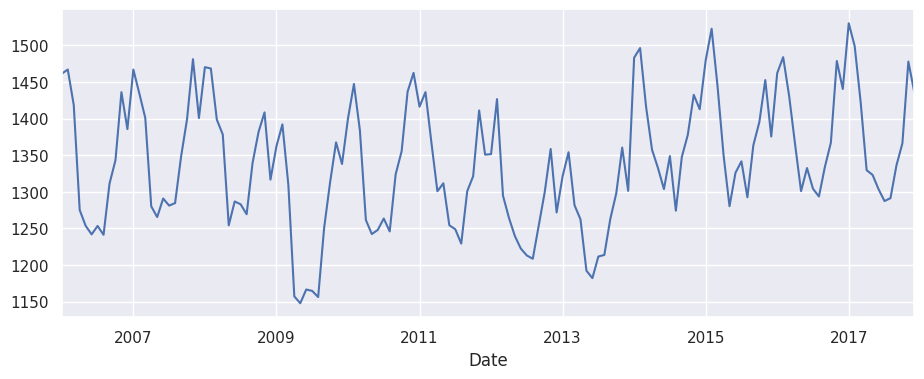

In [144]:
opsd_daily.resample("M").aggregate("mean")["Consumption"].plot()

In [145]:
# Quiz
# what is the average wind generation overall january 2015


In [146]:
# hands on lab
countries_df = pd.read_csv(
    "https://gist.githubusercontent.com/aakashns/28b2e504b3350afd9bdb157893f9725c/raw/994b65665757f4f8887db1c85986a897abb23d84/countries.csv"
)
countries_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [147]:
# Q1 show total number of locations per conetinet , max life_expectancy , average hospital_beds_per_thousand

In [148]:
covid_data_url = "https://gist.githubusercontent.com/aakashns/b2a968a6cfd9fbbb0ff3d6bd0f26262b/raw/b115ed1dfa17f10fc88bf966236cd4d9032f1df8/covid-countries-data.csv"

covid_df = pd.read_csv(covid_data_url)
covid_df

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN
...,...,...,...,...
207,Western Sahara,766.0,1.0,NaN
208,World,26059065.0,863535.0,NaN
209,Yemen,1976.0,571.0,NaN
210,Zambia,12415.0,292.0,NaN


In [149]:
# Q2 merge covid_df with countries_df how=inner

In [150]:
# Q3 find new population after total_deathes for every location

In [151]:
# Q4 for every continetn find total_death per countery , median total_cases , hint np.median